## About Dataset<a id='dd'></a>


Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book. <br>
Source : https://www.kaggle.com/datasets/mirichoi0218/insurance

----

# <u>Exploratory Data Analysis on Medical Cost Billed by Health Insurance</u>
![](https://apicms.thestar.com.my/uploads/images/2024/02/14/thumbs/550/2530329.webp)

## Content
- [Data Description](#dd)

- [Import Library & Data](#il)

- [Data Understanding](#du)

- [Data Preparation](#dp)
    - Removing duplicates

- [Feature Relationships](#fr)
    - Univariate analysis
    - Multivariate analysis
       * 1st level multivariate analysis
       * 2nd level multivariate analysis

- [Data Analysis Summary](#as)

*continue to...* [Models & Predictions](#mp)

<br>

- [Data Preparation](#dp2)
    - Converting cat data into numerical data

- [Splitting Training and Test Set](#st)

- [Scaling Training Set](#sct)

    - OLS Multiple Linear Regression
    - Multiple Linear Regression
    - Neural Network Regression
    


## Data Description<a id='dd'></a>


|Variable Name |	Role	|Type	|Description	|Units	|Missing Values|
|--------------|------------|-------|---------------|-------|--------------|
|age|Feature	| numerical	| age of primary beneficiary	| years	|no|
|sex|Feature|numerical| insurance contractor gender| male/female	|no|
|bmi|Feature	| numerical	| body mass index 	| kg/m^2	|no|
|children|Feature	| ordinal | N children/dependents	| N person	|no|
|smoker|Feature	| binary	| Smoking habit	| yes/no	|no|
|region|Feature	| nominal	| beneficiary resedential area in US| - |no|
|charges|Target	| numerical	| individual medical cost billed by health insurance| years	|no|

## Import Library & Data<a id = 'il'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Understanding<a id = 'du'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
for col in df.columns:
    print(df[col].value_counts(),'\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64 

sex
male      676
female    662
Name: count, dtype: int64 

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64 

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 

smoker
no     1064
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 

charges
1639.56310     2
16884.92400    1
29

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Preparation<a id = 'dp'></a>

Removing duplicates

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df = df.drop_duplicates(keep='first')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Feature Relationship<a id = 'fr'></a>
This is the longest part of the EDA, I've summarized all my findings [here](#here)

#### Univariate analysis

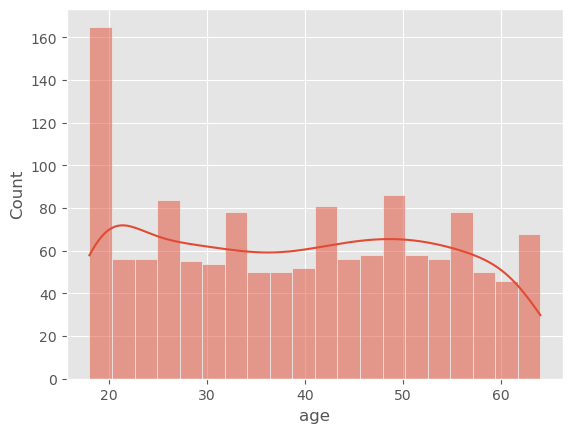

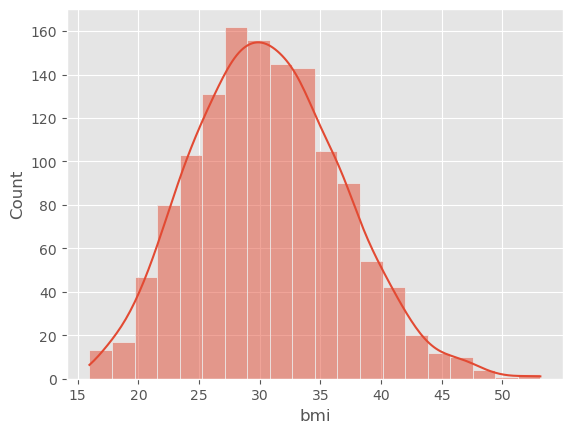

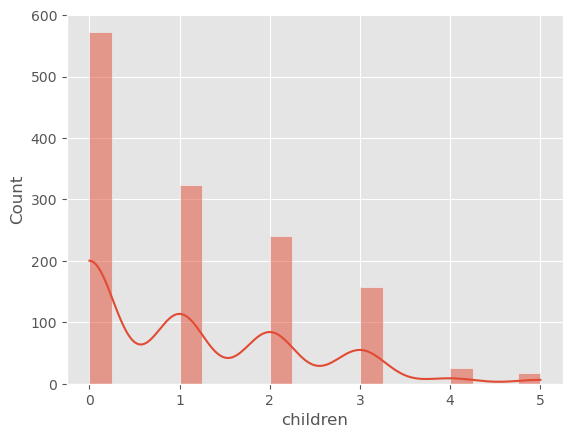

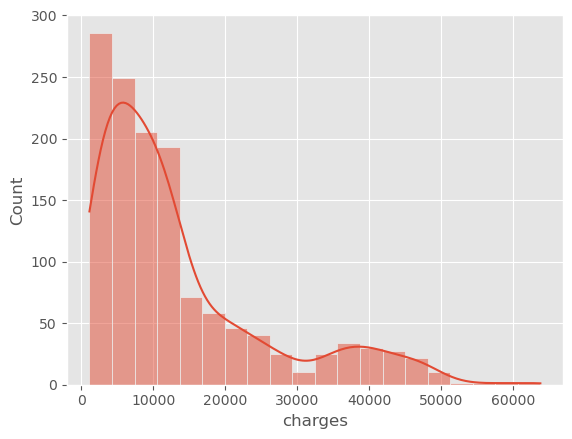

In [10]:
# check distribution for each numerical variables
num_col = ['age','bmi','children','charges']
for label in num_col:
    sns.histplot(data=df,x=label,bins=20,kde=True)
    plt.show()

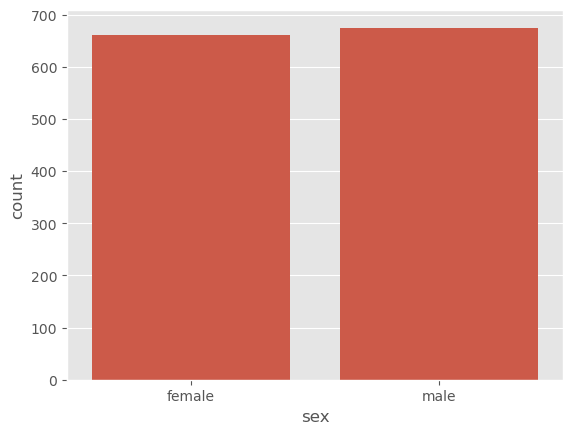

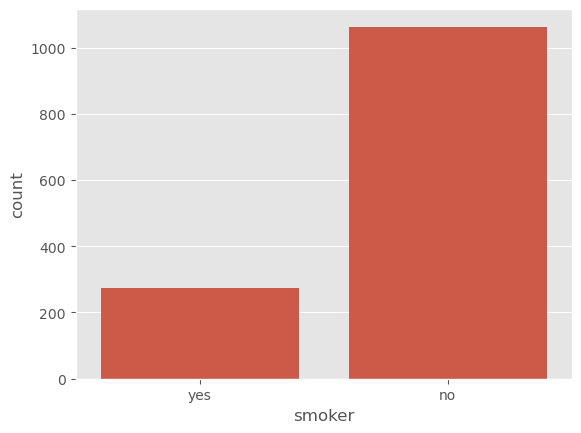

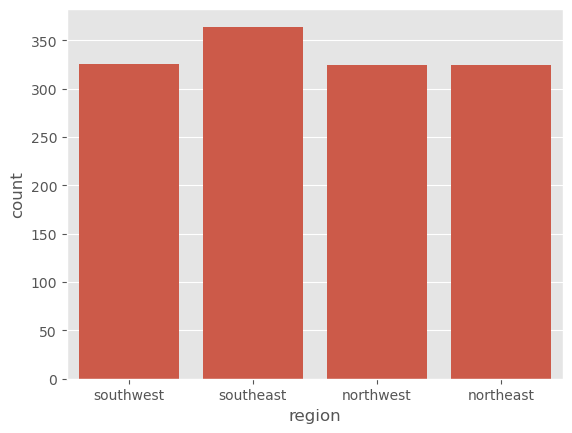

In [11]:
# check countplot of all objects
obj_col = df.select_dtypes('object').columns
for label in obj_col:
    sns.countplot(data=df,x=label)
    plt.show()

Now that we understand distribution and proportion of each variable, we can proceed to do multivariate analysis to see relationship between them

#### Multivariate analysis

In [12]:
df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

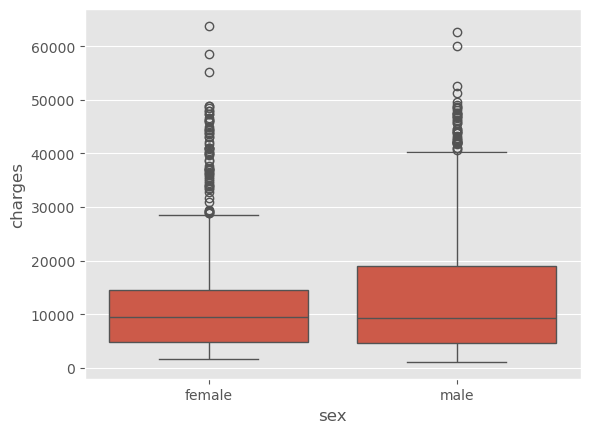

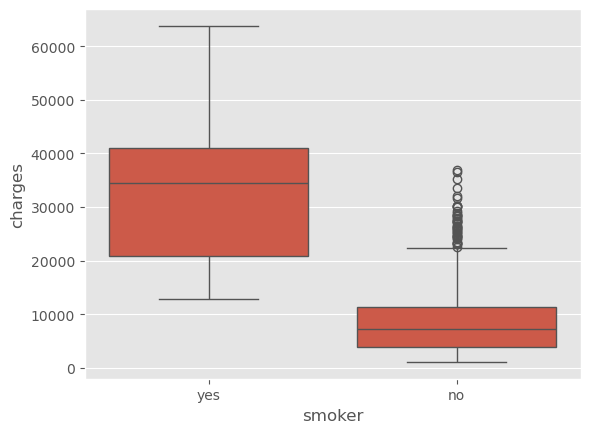

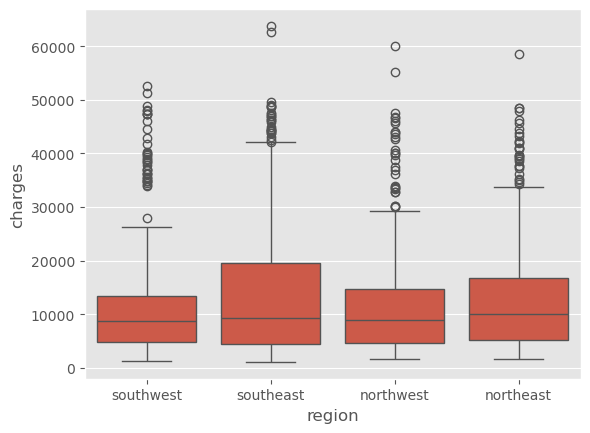

In [13]:
# check relationship between object vs target ['charges']
for label in obj_col:
    sns.boxplot(data=df,x=label, y=df['charges'])
    plt.show()

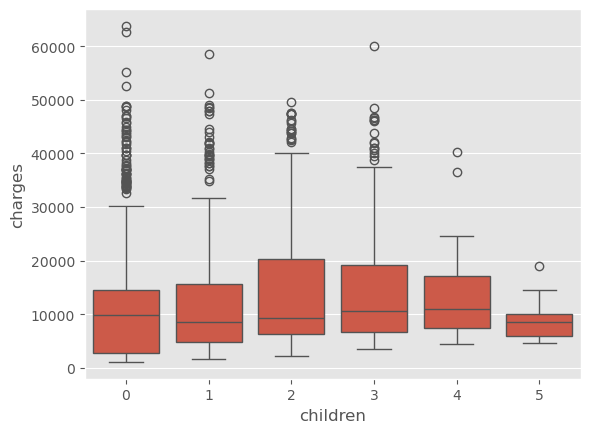

In [14]:
sns.boxplot(data=df,x='children', y=df['charges'])
plt.show()

We can visually see from box plot, there is a significant difference in charges between smoker and nonsmoker. We continue to do inferential statistics on how each variable relate to our target ['charges']

In [15]:
df.groupby('sex')[['charges']].agg(['mean','std','median'])

charges                         
                mean           std     median
sex                                          
female  12569.578844  11128.703801  9412.9625
male    13974.998864  12971.958663  9377.9047

We see from box plot, that male tend to be charged higher than female. Lets do hypothesis test

In [16]:
stats.levene(df['charges'][df['sex']=='female'],
            df['charges'][df['sex']=='male'],
            center='mean')

LeveneResult(statistic=23.28479215050607, pvalue=1.5576879574271898e-06)

In [17]:
stats.ttest_ind(df['charges'][df['sex']=='male'],
               df['charges'][df['sex']=='female'],
               equal_var=False)

TtestResult(statistic=2.1275372170149476, pvalue=0.033561547636765776, df=1311.8540822395769)

Pvalue = 0.0335 (< 0.05). Statistically there is significant difference between charges and sex. We can include ['sex'] as one of our feature in machine learning.

In [18]:
df.groupby('smoker')[['charges']].agg(['mean','std','median'])

charges                           
                mean           std       median
smoker                                         
no       8440.660307   5992.973800   7345.72660
yes     32050.231832  11541.547176  34456.34845

We see an obvious relationship between charges and smokers/nsmokers

In [19]:
stats.levene(df['charges'][df['smoker']=='yes'],
            df['charges'][df['smoker']=='no'],
            center='mean')

LeveneResult(statistic=403.2935860959446, pvalue=1.354744545136564e-78)

In [20]:
stats.ttest_ind(df['charges'][df['smoker']=='yes'],
               df['charges'][df['smoker']=='no'],
               equal_var=False)

TtestResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103, df=311.87741711542276)

Pvalue = 6.261 E-103 (< 0.05). Statistically there is significant difference between charges and smoker. We can include ['smoker'] as one of our feature in machine learning.

#### Comparing charges vs regions

In [21]:
df.groupby('region')[['charges']].agg(['mean','std','median'])

charges                            
                   mean           std        median
region                                             
northeast  13406.384516  11255.803066  10057.652025
northwest  12450.840844  11073.125699   8976.977250
southeast  14735.411438  13971.098589   9294.131950
southwest  12346.937377  11557.179101   8798.593000

In [22]:
stats.levene(df['charges'][df['region']=='northeast'],
            df['charges'][df['region']=='northwest'],
             df['charges'][df['region']=='southeast'],
             df['charges'][df['region']=='southwest'],
            center='mean')

LeveneResult(statistic=11.769578525410552, pvalue=1.3026850282550177e-07)

In [23]:
stats.f_oneway(df['charges'][df['region']=='northeast'],
            df['charges'][df['region']=='northwest'],
             df['charges'][df['region']=='southeast'],
             df['charges'][df['region']=='southwest'])

F_onewayResult(statistic=2.926139903662777, pvalue=0.03276288025444947)

Pvalue = 0.032 (< 0.05). Statistically there is significant difference between charges and smoker. We can include ['region'] as one of our feature in machine learning.

#### Comparing charges vs children

In [24]:
df.groupby('children')[['charges']].agg(['mean','std','median'])

charges                           
                  mean           std       median
children                                         
0         12384.695344  12025.424152   9863.47180
1         12731.171832  11823.631451   8483.87015
2         15073.563734  12891.368347   9264.97915
3         15355.318367  12330.869484  10600.54830
4         13850.656311   9139.223321  11033.66170
5          8786.035247   3808.435525   8589.56505

In [25]:
stats.f_oneway(df['charges'][df['children']==0],
               df['charges'][df['children']==1],
               df['charges'][df['children']==2],
               df['charges'][df['children']==3],
               df['charges'][df['children']==4],
               df['charges'][df['children']==5])

F_onewayResult(statistic=3.2687344101195737, pvalue=0.006133448188169501)

Pvalue = 0.006 (<0.04). Statistically there is significant difference between charges and N children. We can include ['children'] as one of our features in machine learning

When we treat children variable as number and plot a scatter plot, the R coef is very low which means there is no correlation between charges and N children. However, if we treat children as a category (0 -5) we can see P-value is <0.05. We will treat children as category from this point onwards.

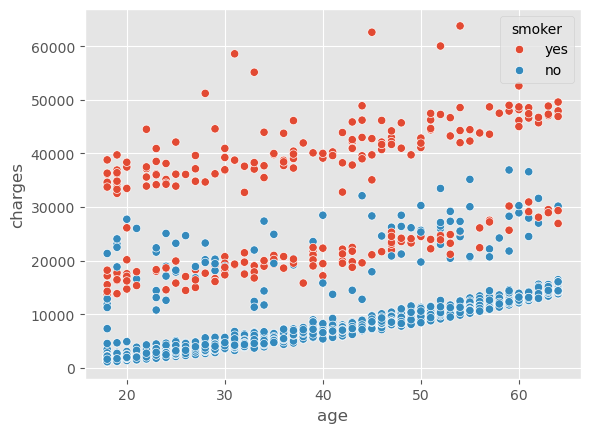

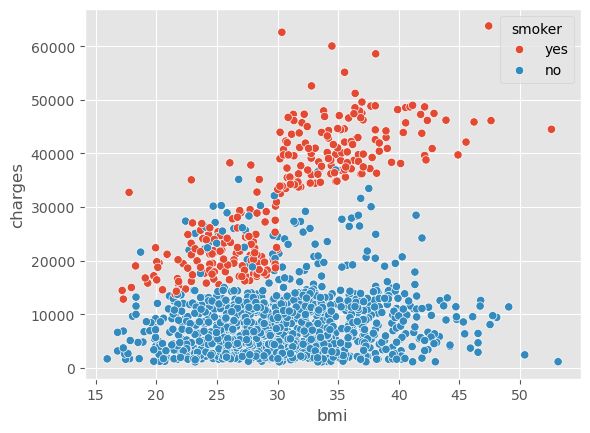

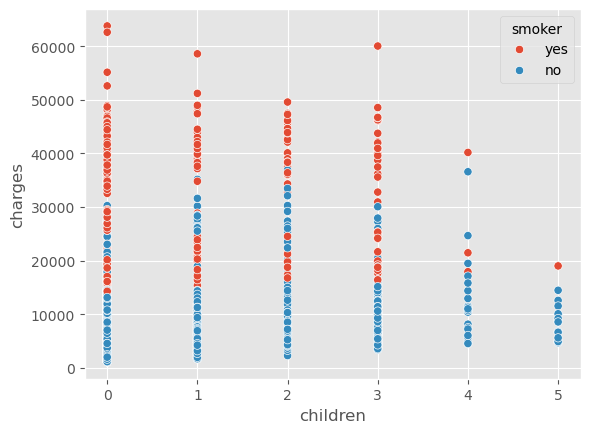

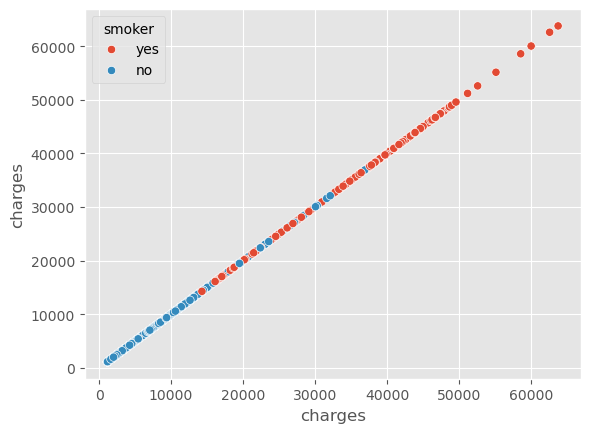

In [26]:
# scatter plot numerical feature vs output label [charges], 'smoker' as hue
for label in num_col:
    sns.scatterplot(data=df,x=label,y=df['charges'], hue=df['smoker'])
    plt.show()

Pay attention to the relationship between charges vs age and bmi. Charges increase with age. Charges also increases with BMI but only for smokers. Lets look at the correlation for all the numerical variables

<Axes: >

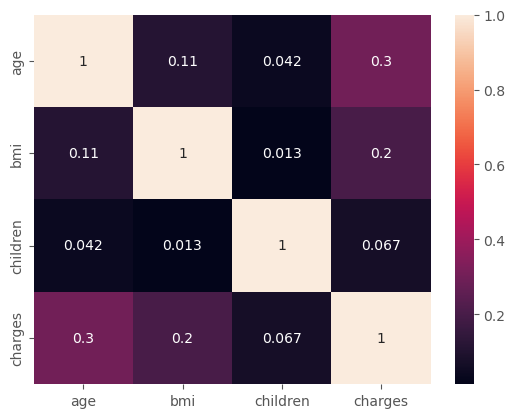

In [27]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)

#### 2nd level of multivariate analysis

We'll go deeper into multivariate analysis and try to get as much info as we can

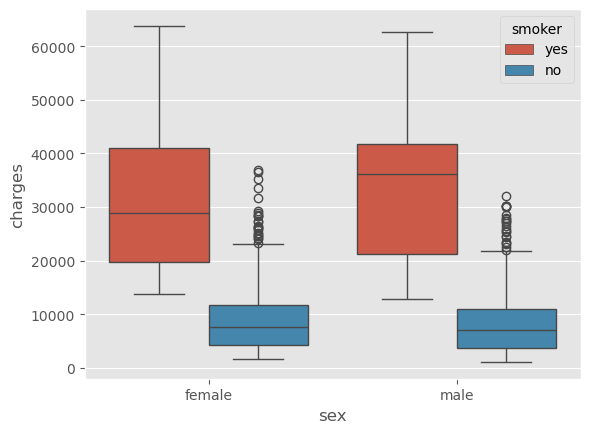

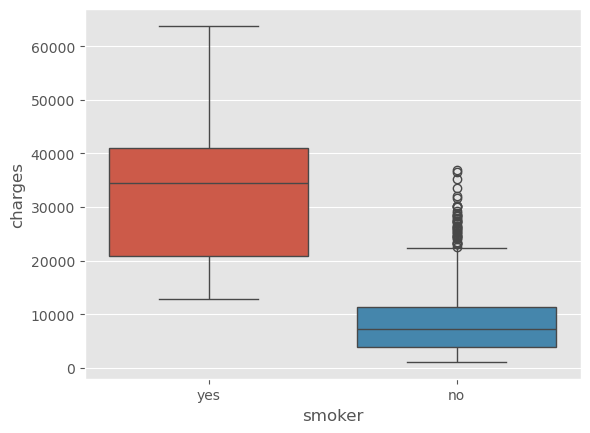

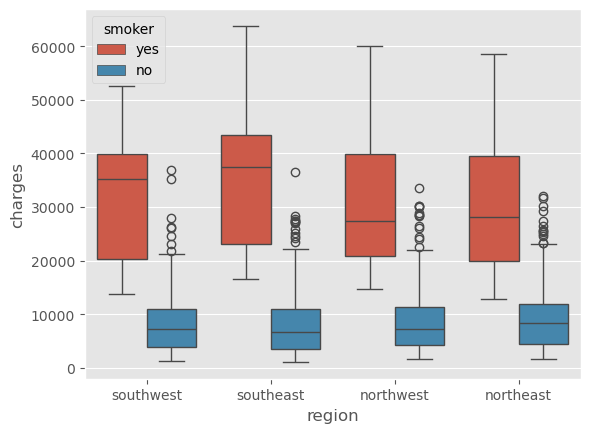

In [28]:
# check relationship between object vs target ['charges']
for label in obj_col:
    sns.boxplot(data=df,x=label, y='charges',hue='smoker')
    plt.show()

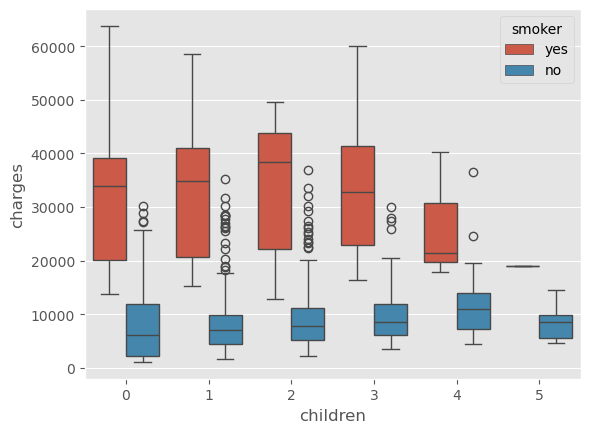

In [29]:
sns.boxplot(data=df,x='children', y='charges',hue='smoker')
plt.show()

In [30]:
df[df['smoker']=='yes'].groupby('sex')[['charges']].agg(['mean','median','std'])

charges                          
                mean      median           std
sex                                           
female  30678.996276  28950.4692  11907.536381
male    33042.005975  36085.2190  11202.670862

When segregated gender and compare charges of smokers vs non smokers. We can see male smokers tend to be charged higher compared to female smokers. Whether the mean is significant or not, we can do hypothesis test

In [31]:
stats.levene(df['charges'][(df['smoker']=='yes')&(df['sex']=='male')],
             df['charges'][(df['smoker']=='yes')&(df['sex']=='female')],
             center='mean')

LeveneResult(statistic=1.4080481129778273, pvalue=0.23641607215279906)

In [32]:
stats.ttest_ind(df['charges'][(df['smoker']=='yes')&(df['sex']=='male')],
             df['charges'][(df['smoker']=='yes')&(df['sex']=='female')],
             equal_var=True)

TtestResult(statistic=1.6780825715285819, pvalue=0.09447953030991117, df=272.0)

From hypothesis test pvalue is >0.05, this shows that the difference in mean insignificant.

In [33]:
df[df['smoker']=='yes'].groupby('region')[['charges']].agg(['mean','median','std'])

charges                            
                   mean        median           std
region                                             
northeast  29673.536473  28101.333050  11589.559770
northwest  30192.003182  27488.996475  11413.827702
southeast  34844.996824  37484.449300  11324.766536
southwest  32269.063494  35165.256500  11270.279593

When segregated gender and compare charges of smokers and non smokers. We can see male smokers tend to be charged higher compared to female smokers

When we compared charges against region, we couldnt extract any good insights from the box plots. However when we segregate between smoker and compare charges by region. We can see both southeast and southwest part of the US have higher charges.

<Axes: xlabel='children', ylabel='charges'>

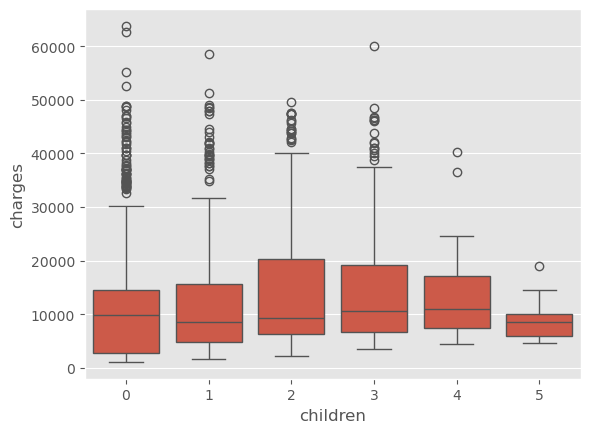

In [34]:
sns.boxplot(data=df,x='children',y='charges')

<Axes: xlabel='children', ylabel='charges'>

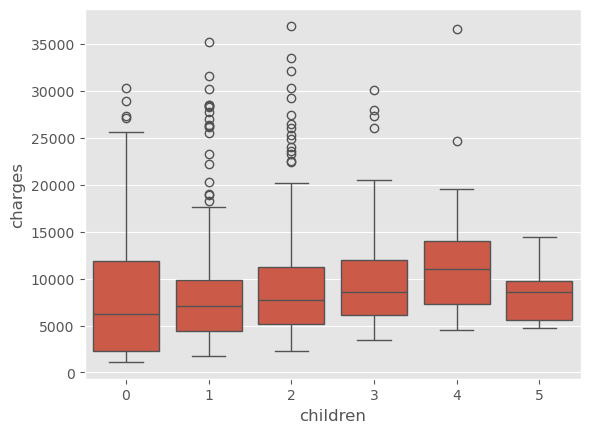

In [35]:
df_nsmoker = df[(df['smoker']=='no')]
sns.boxplot(data=df_nsmoker,x='children',y='charges')

<Axes: xlabel='children', ylabel='charges'>

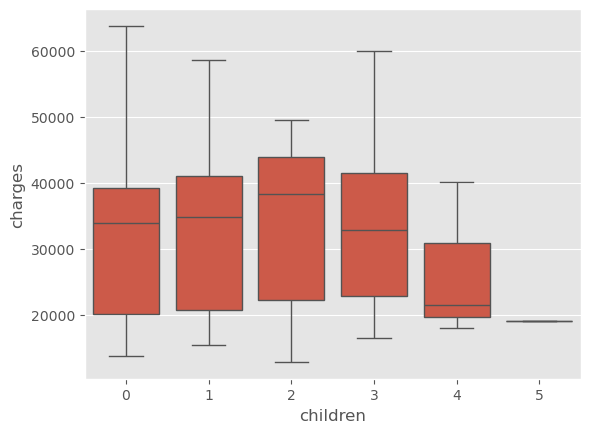

In [36]:
df_smoker = df[(df['smoker']=='yes')]
sns.boxplot(data=df_smoker,x='children',y='charges')

<Axes: xlabel='children', ylabel='charges'>

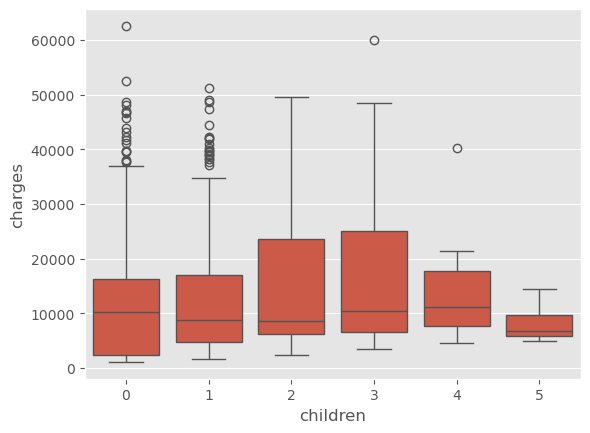

In [37]:
df_sex = df[df['sex']=='male']
sns.boxplot(data=df_sex,x='children',y='charges')

<Axes: xlabel='children', ylabel='charges'>

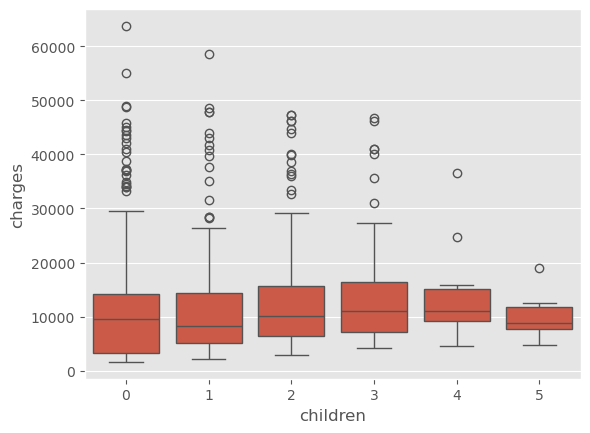

In [38]:
df_sex = df[df['sex']=='female']
sns.boxplot(data=df_sex,x='children',y='charges')

<Axes: xlabel='charges', ylabel='sex'>

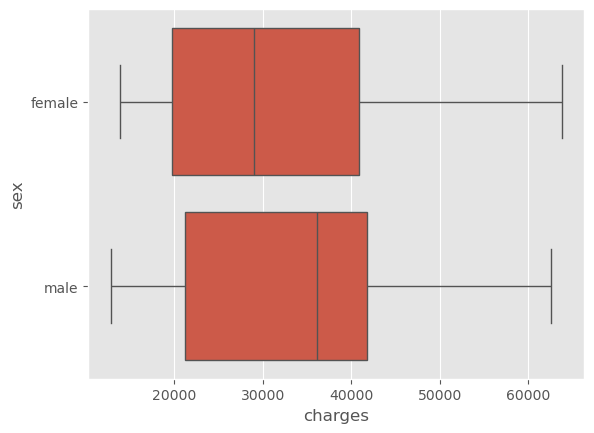

In [39]:
df_smoker = df[(df['smoker']=='yes')]
sns.boxplot(data=df_smoker,y='sex',x='charges', orient='h')

#### Comparing male and female smokers' charges. 

In [40]:
df_smoker.groupby('sex').charges.agg(['mean','median','std'])

,mean,median,std
sex,,,
female,30678.996276,28950.4692,11907.536381
male,33042.005975,36085.2190,11202.670862


In [41]:
stats.levene(df_smoker['charges'][df_smoker['sex']=='male'],
           df_smoker['charges'][df_smoker['sex']=='female'],
           center='mean')

LeveneResult(statistic=1.4080481129778273, pvalue=0.23641607215279906)

In [42]:
stats.ttest_ind(df_smoker['charges'][df_smoker['sex']=='male'],
           df_smoker['charges'][df_smoker['sex']=='female'],
               equal_var=True)

TtestResult(statistic=1.6780825715285819, pvalue=0.09447953030991117, df=272.0)

## Data Analysis Summary<a id='as'></a>
<a id='here'></a>
Univariate analysis : <br>
&emsp;- BMI distribution showed normal distribution where mean = 30.66, median = 30.4 measured in kg/m^2 
<br>
<br>
Multivariate analysis : <br>
&emsp;- There is a good correlation between charges against age (R=0.3) and bmi(R=0.2) <br>
&emsp;- Whether the client is a smoker or not (Pvalue=1.3E-7)  also affects the charges <br> 

| Variable1           |type|Target| type   | Test | P-value |  R coef |
|:--------------------|:----|---------|---------|:----:|:---------:|:-------:|
| age                 | num | charges | num     | corr |    -    | 0.3       |
| bmi                 | num | charges | num     | corr |   -     |0.2        |
| children            | num | charges | num     | corr |   -     | 0.067     |
| sex (male vs female)| cat | charges | num     | Ttest | 0.0335 |    -      |
| smoker (yes vs no)  | cat | charges | num     | Ttest | 0.0000 |     -     |
| regions (4 regions) | cat | charges | num     | Ttest | 0.0327 |     -     |
| children (0 - 5)    | cat | charges | num     | Foneway | 0.0061 |     -   |

<br><br>
In summary :
- Charges increase with age
- Charges increase with BMI for smokers but no difference for non smokers. 
- Higher charges observed in male smokers living in the southeast and southwest of the US

-----

# Models and predictions<a id='mp'></a>

## Prediction Models

| Variable1           |type|Target| type   | Test | P-value |  R coef |
|:--------------------|:----|---------|---------|:----:|:---------:|:-------:|
| age                 | num | charges | num     | corr |    -    | 0.3       |
| bmi                 | num | charges | num     | corr |   -     |0.2        |
| sex (male vs female)| cat | charges | num     | Ttest | 0.0335 |    -      |
| smoker (yes vs no)  | cat | charges | num     | Ttest | 0.0000 |     -     |
| regions (4 regions) | cat | charges | num     | Ttest | 0.0327 |     -     |
| children (0 - 5)    | cat | charges | num     | Foneway | 0.0061 |     -   |

Based on the information that we have so far, we will consider all 6 features to be used in our multiple linear regression

## Data Preparation<a id='dp2'></a>
Lets prepare our data so that we can treat each feature as numbers for our model. Lets start by using label encoding for our 'sex', 'smoker' and 'region'. 

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Changing feature sex, male = true, female = false

In [44]:
#df = df.drop(columns='sex') for testing
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,yes,southwest,16884.92400
1,18,True,33.770,1,no,southeast,1725.55230
2,28,True,33.000,3,no,southeast,4449.46200
3,33,True,22.705,0,no,northwest,21984.47061
4,32,True,28.880,0,no,northwest,3866.85520


Changing smoker, yes = true, no = false

In [45]:
df['smoker'] = pd.get_dummies(df['smoker'],drop_first=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


One hot coding for regions

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


In [47]:
# Replacing region contain the word south to 1 and north to 0 for testing
#for i in df[['region']]:
#    df['region'] = df['region'].str.contains('south', case=False, na=False).astype(int)

In [48]:
col = ['northeast','northwest','southeast','southwest']
df[col] = pd.get_dummies(df['region'],drop_first=False)

In [49]:
df = df.drop(columns='region')

In [50]:
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
         'northwest', 'southeast', 'southwest','charges']]
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,False,27.900,0,True,False,False,False,True,16884.92400
1,18,True,33.770,1,False,False,False,True,False,1725.55230
2,28,True,33.000,3,False,False,False,True,False,4449.46200
3,33,True,22.705,0,False,False,True,False,False,21984.47061
4,32,True,28.880,0,False,False,True,False,False,3866.85520


In [51]:
# drop children feature for testing
#df = df.drop(columns='children')

In [52]:
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,False,27.900,0,True,False,False,False,True,16884.92400
1,18,True,33.770,1,False,False,False,True,False,1725.55230
2,28,True,33.000,3,False,False,False,True,False,4449.46200
3,33,True,22.705,0,False,False,True,False,False,21984.47061
4,32,True,28.880,0,False,False,True,False,False,3866.85520


Setting our x and y values 

In [53]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Split Training and Test Set<a id='st'></a>

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## Scaling Training Set<a id='sct'></a>

In [55]:
# Standardization, normalization of train set (careful not to run many times)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(x_train)

x_train = scaler.transform(x_train)

In [56]:
x_train

array([[ 0.26227135, -0.98976241, -1.76779252, ..., -0.56834831,
        -0.60148436, -0.57843044],
       [-1.51041501,  1.01034348,  0.60335531, ..., -0.56834831,
         1.66255361, -0.57843044],
       [-1.15587773, -0.98976241,  0.97258514, ..., -0.56834831,
        -0.60148436, -0.57843044],
       ...,
       [-0.73043301,  1.01034348,  1.07478268, ..., -0.56834831,
         1.66255361, -0.57843044],
       [-1.43950755,  1.01034348,  0.78467353, ...,  1.75948442,
        -0.60148436, -0.57843044],
       [ 0.97134589,  1.01034348, -0.71861936, ..., -0.56834831,
        -0.60148436, -0.57843044]])

#### OLS Linear Regression

In [57]:
import statsmodels.api as sm

# add constant into Train Set input
x_train = sm.add_constant(x_train)

# training the algorithm using train set
reg_model = sm.OLS(y_train, x_train).fit()

In [58]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     395.1
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          9.52e-312
Time:                        17:26:46   Log-Likelihood:                -10808.
No. Observations:                1069   AIC:                         2.163e+04
Df Residuals:                    1060   BIC:                         2.168e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.308e+04    182.726     71.602      0.000    1.27e+04    1.34e+04
x1          3444.1178    184.171     18.701      0.000    3082.736    3805.500
x2          -100.8574    183.208     -0.551      0.582    -460.348     258.633
x3          1892.5935    191.880      9.863      0.000    1516.086    2269.101
x4           591.2719    183.117      3.229      0.001     231.958     950.586
x5          9552.3603    183.570     52.036      0.000    9192.158    9912.563
x6           273.7413    139.427      1.963      0.050       0.157     547.326
x7            82.9461    139.379      0.595      0.552    -190.544     356.436
x8          -155.3264    140.737     -1.104      0.270    -431.481     120.828
x9          -193.4610    137.220     -1.410      0.159    -462.715      75.793
==============================================================================
Omnibus:                      269.407   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.940
Skew:                           1.287   Prob(JB):                    2.57e-160
Kurtosis:                       6.142   Cond. No.                     2.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest', 'charges'],
      dtype='object')

In [60]:
# Scale the input of Test set (x_test)
x_test = scaler.transform(x_test)

In [61]:
x_test = sm.add_constant(x_test)
# Apply x_test into the model
y_pred = reg_model.predict(x_test)

In [62]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted'].round(2)
df_validate.head(10)

,Actual,Predicted
1248,1633.96180,5119.96
610,8547.69130,9434.20
393,9290.13950,11331.69
503,32548.34050,25966.53
198,9644.25250,6932.28
821,2680.94930,506.66
31,2198.18985,1899.97
1251,1241.56500,-1177.79
1299,2710.82855,2010.09
1151,12235.83920,14391.29


In [63]:
df_validate.corr()

,Actual,Predicted
Actual,1.000000,0.871164
Predicted,0.871164,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


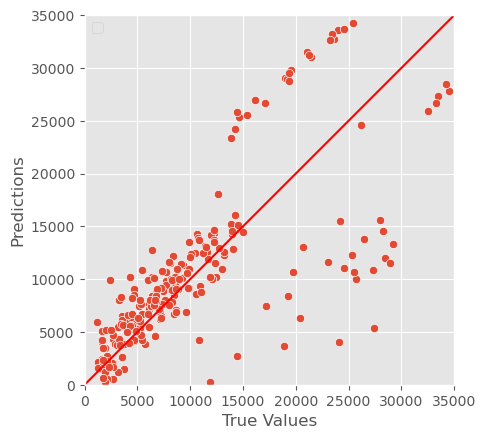

In [64]:
ax = plt.axes(aspect='equal')
sns.scatterplot(data=df_validate, x= 'Actual', y='Predicted')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0,35000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c='red')
plt.show()

#### Multiple Linear Regression

In [65]:
# remove constant from OLS
#x_train = x_train[:,1:]
#x_test = x_test[:,1:]

In [66]:
import tensorflow as tf

In [67]:
# redefine x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [70]:
x_train = x_train.replace({True:1,False:0})
x_test = x_test.replace({True:1,False:0})

In [72]:
x_train = x_train.values
x_test = x_test.values

In [73]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(x_train, y_train)

LinearRegression()

In [74]:
ln_reg.score(x_test, y_test)

0.7530385567240125

### Neural Network

In [90]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')    # epoch is training cycles
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [76]:
# redefine x and y
#x = df.iloc[:,:-1]
#y = df.iloc[:,-1]

In [77]:
normalizer = tf.keras.layers.Normalization(axis=None)
normalizer.adapt(x_train.reshape(-1))

In [100]:
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [101]:
history = nn_model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    verbose=0, epochs = 100
)

In [102]:
y_pred_lr = ln_reg.predict(x_test)
y_pred_nn = nn_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


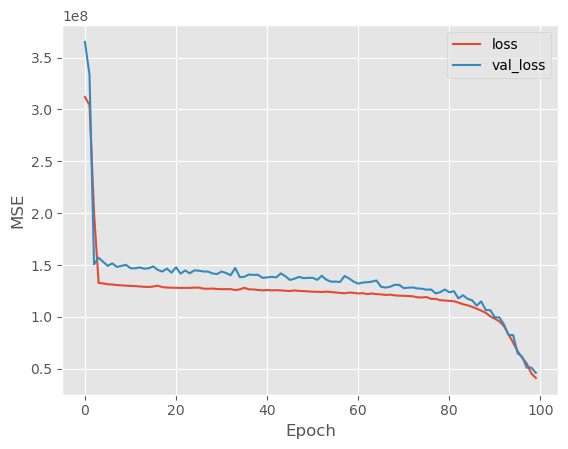

In [103]:
plot_loss(history)

## Model Evaluation<a id='me'></a>

In [122]:
df_validate.corr()

,Actual,Predicted
Actual,1.000000,0.871164
Predicted,0.871164,1.000000


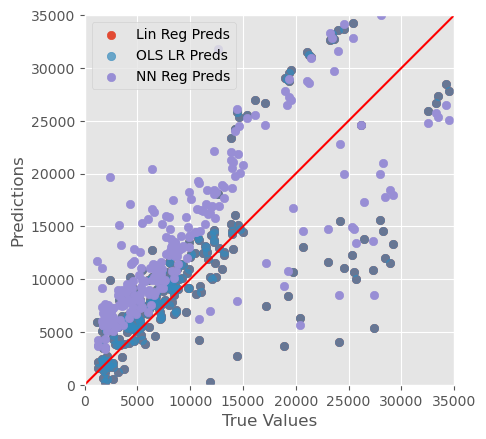

In [109]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_lr, label ='Lin Reg Preds')
plt.scatter(y_test,df_validate['Predicted'], label ='OLS LR Preds',alpha=0.7)
plt.scatter(y_test, y_pred_nn, label ='NN Reg Preds')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0,35000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c='red')

In [126]:
import math
def MSE(y_pred,y_real):
    return (np.square(y_pred-y_real)).mean()

In [128]:
mse_ols = MSE(df_validate['Predicted'],y_test)
mse_ols

41546213.16314797

In [124]:
mse_lr = MSE(y_pred_lr,y_test)
mse_lr

41546216.660868414

In [125]:
mse_nn = MSE(y_pred_nn.reshape(-1),y_test)
mse_nn

45933979.17817775

In [129]:
math.sqrt(mse_ols)

6445.635202456619

In [130]:
math.sqrt(mse_lr)

6445.635473781341

In [131]:
math.sqrt(mse_nn)

6777.46111594731

Homoscadasticity of the model is not that great. This model predictions will still be good for predicting charges up to 15000. Lets try to make it better

--------